# **Experiment 10: Object Detection**
Implement and compare object detection using both traditional computer vision methods and
modern deep learning techniques.

Traditional Haar Cascade Result:


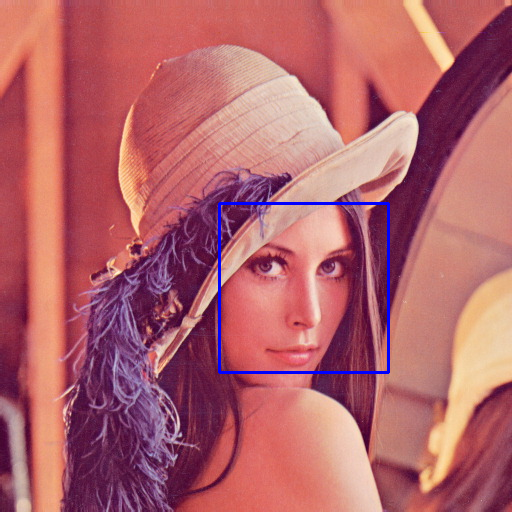

In [ ]:
# Taditional Method

import cv2
from google.colab.patches import cv2_imshow

# Load the pre-trained Haar Cascade for face detection
# OpenCV provides these XML files in their data folder
!wget -q https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Load image
!wget -q -O sample.jpg https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg
img = cv2.imread('sample.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.1, 4)

# Draw rectangles
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

print("Traditional Haar Cascade Result:")
cv2_imshow(img)

Modern Deep Learning Result:


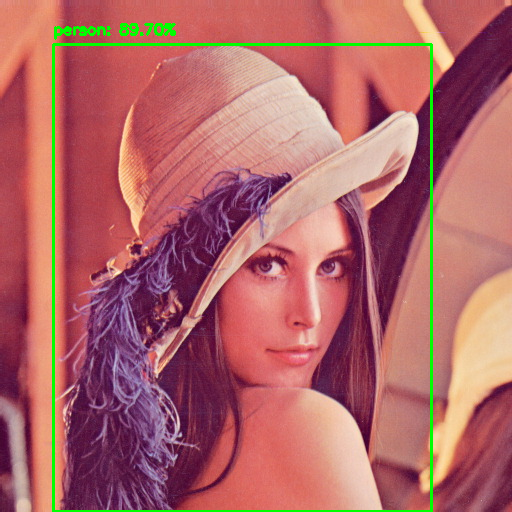

In [ ]:
#  DeepLearning

import cv2
import numpy as np

# Download model files (Caffe implementation of SSD-MobileNet)
!wget -q https://raw.githubusercontent.com/chuanqi305/MobileNet-SSD/master/deploy.prototxt
!wget -q https://github.com/chuanqi305/MobileNet-SSD/blob/master/mobilenet_iter_73000.caffemodel?raw=true -O mobilenet.caffemodel

# Class labels for this specific model
CLASSES = ["background", "aeroplane", "bicycle", "bird", "boat", "bottle", "bus", "car", "cat", "chair", "cow", "diningtable", "dog", "horse", "motorbike", "person", "pottedplant", "sheep", "sofa", "train", "tvmonitor"]

# Load the network
net = cv2.dnn.readNetFromCaffe('deploy.prototxt', 'mobilenet.caffemodel')

# Prepare the image (Resize to 300x300 and normalize)
image = cv2.imread('sample.jpg')
(h, w) = image.shape[:2]
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 0.007843, (300, 300), 127.5)

# Forward pass through the network
net.setInput(blob)
detections = net.forward()

# Loop over detections
for i in range(0, detections.shape[2]):
    confidence = detections[0, 0, i, 2]
    if confidence > 0.5: # Filter weak detections
        idx = int(detections[0, 0, i, 1])
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")

        label = f"{CLASSES[idx]}: {confidence*100:.2f}%"
        cv2.rectangle(image, (startX, startY), (endX, endY), (0, 255, 0), 2)
        cv2.putText(image, label, (startX, startY - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

print("Modern Deep Learning Result:")
cv2_imshow(image)